In [22]:
import pandas as pd
import polars as pl
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
machine_MILL_path = r"Machine_#2_MILL\Machine_#2_MILL"
machine_MILL_days = os.listdir(machine_MILL_path)

# Charge les data de MILL de chaque jour dans un dict
data_MILL = {}
for file in machine_MILL_days :
    file_path = os.path.join(machine_MILL_path, file)
    data_MILL[file] = pl.read_parquet(file_path)
    data_MILL[file] = data_MILL[file].drop("time")


In [3]:
print(data_MILL)

{'13-03-2025_10h35.parquet': shape: (3_177_584, 85)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ stSigAxCu ┆ stSigAxCu ┆ stSigAxCu ┆ stSigAxCu ┆ … ┆ stSigAxPo ┆ stSigAxPo ┆ stSigPowe ┆ __index_ │
│ rrentB    ┆ rrentC    ┆ rrentX    ┆ rrentY    ┆   ┆ werY      ┆ werZ      ┆ rMotS     ┆ level_0_ │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ _        │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ i64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ null      ┆ null      ┆ null      ┆ 0.623217  ┆ … ┆ null      ┆ null      ┆ null      ┆ 0        │
│ 0.305296  ┆ 0.322347  ┆ 0.180628  ┆ null      ┆ … ┆ 0.989401  ┆ 6.314389  ┆ null      ┆ 1        │
│ null      ┆ null      ┆ null      ┆ 0

In [4]:
def combine_first_columns_from_csv(directory):
    """
    Lit tous les fichiers CSV dans un dossier, extrait la première colonne de chacun,
    et les combine en un seul DataFrame avec le nom des fichiers comme colonnes.
    """
    combined_df = pd.DataFrame()  # DataFrame vide pour stocker les données

    for file in os.listdir(directory):
        if file.endswith(".csv"):  # Vérifier si c'est un fichier CSV
            file_path = os.path.join(directory, file)
            
            # Lire seulement la première colonne du fichier
            try :
                df = pd.read_csv(file_path, usecols=[1],sep=";") 
            except :
                print(file_path)
                break

            # Renommer la colonne avec le nom du fichier sans extension
            column_name = os.path.splitext(file)[0]
            df.columns = [column_name]

            # Concaténer avec le DataFrame principal (axis=1 pour fusionner en colonnes)
            combined_df = pd.concat([combined_df, df], axis=1)
        
    print("folder done")

    return combined_df

In [5]:
machine_MECATIS_path = r"Machine_#1_Mecatis\Machine_#1_Mecatis"
machine_MECATIS_days = os.listdir(machine_MECATIS_path)

data_MECATIS = {}
for index, folder in enumerate(machine_MECATIS_days) :
    folder_path = os.path.join(machine_MECATIS_path, folder)
    data_MECATIS[folder] = combine_first_columns_from_csv(folder_path)


folder done
folder done
folder done
folder done
folder done
folder done


In [6]:
machine_LOCLE_path = r"Machine_#3_Locle"
machine_LOCLE_days = os.listdir(machine_LOCLE_path)

data_LOCLE = {}
for index, folder in enumerate(machine_LOCLE_days) :
    folder_path = os.path.join(machine_LOCLE_path, folder)
    data_LOCLE[folder] = combine_first_columns_from_csv(folder_path)

folder done
folder done


In [7]:
print(data_LOCLE)

{'2025_03_18_Heating_Cycle_MecatisLL':          diCodeMesure  lrSigAxeBTemp  lrSigAxeCTemp  lrSigAxeXTemp  \
0                 0.0           10.0        35.2262           10.0   
1                 0.0           10.0        35.2262           10.0   
2                 0.0           10.0        35.3161           10.0   
3                 0.0           10.0        35.1723           10.0   
4                 0.0           10.0        35.1723           10.0   
...               ...            ...            ...            ...   
1716533           NaN            NaN            NaN            NaN   
1716534           NaN            NaN            NaN            NaN   
1716535           NaN            NaN            NaN            NaN   
1716536           NaN            NaN            NaN            NaN   
1716537           NaN            NaN            NaN            NaN   

         lrSigAxeYTemp  lrSigAxeZTemp  lrSigCryoLubState  \
0                 10.0           -5.0                0.0   


In [8]:
def check_df(df):
    # Afficher les premières lignes
    print("HEAD")
    print(df.head(), "\n")

    # Voir les infos du DataFrame
    print("Info")
    print(df.info(), "\n")

In [9]:

def get_machine_means_dict(machine_dict : dict):
    means_dict = {}
    for key, df in machine_dict.items(): 
        means_dict[key]=df.mean()
        means_dict[key].name = key
        print(f"means {key} done")
    print("DONE")
    return means_dict

def get_machine_vars_dict(machine_dict : dict):
    vars_dict = {}
    for key, df in machine_dict.items(): 
        vars_dict[key]=df.var()
        vars_dict[key].name = key
        print(f"vars {key} done")
    print("DONE")
    return vars_dict

In [10]:
MECATIS_means=get_machine_means_dict(data_MECATIS)
MECATIS_vars=get_machine_vars_dict(data_MECATIS)


means Warmup_Mecatis_03_02_25 done
means Warmup_Mecatis_05_02_25 done
means Warmup_Mecatis_10_03_25 done
means Warmup_Mecatis_10_03_25_3 done
means Warmup_Mecatis_10_03_25_4 done
means Warmup_Mecatis_10_03_25_5 done
DONE
vars Warmup_Mecatis_03_02_25 done
vars Warmup_Mecatis_05_02_25 done
vars Warmup_Mecatis_10_03_25 done
vars Warmup_Mecatis_10_03_25_3 done
vars Warmup_Mecatis_10_03_25_4 done
vars Warmup_Mecatis_10_03_25_5 done
DONE


In [11]:
MILL_means=get_machine_means_dict(data_MILL)
MILL_vars=get_machine_vars_dict(data_MILL)

means 13-03-2025_10h35.parquet done
means 13-03-2025_7h35.parquet done
means 19-02-2025_9h20.parquet done
DONE
vars 13-03-2025_10h35.parquet done
vars 13-03-2025_7h35.parquet done
vars 19-02-2025_9h20.parquet done
DONE


In [12]:
LOCLE_means=get_machine_means_dict(data_LOCLE)
LOCLE_vars=get_machine_vars_dict(data_LOCLE)

means 2025_03_18_Heating_Cycle_MecatisLL done
means 2025_03_20_Warmup_V5_LL done
DONE
vars 2025_03_18_Heating_Cycle_MecatisLL done
vars 2025_03_20_Warmup_V5_LL done
DONE


In [13]:
#debug

print(type(MILL_means['13-03-2025_10h35.parquet']))
for i in MECATIS_means.values():
    print(i.shape)
    print(type(i))
    print(i.name)

print("\n")
for key, df in MILL_means.items():
    df = df.to_pandas().transpose().squeeze()
    df.name = key
    print(df.shape)
    print(type(df))
    print(df.name)

<class 'polars.dataframe.frame.DataFrame'>
(74,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_03_02_25
(74,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_05_02_25
(74,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_10_03_25
(74,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_10_03_25_3
(74,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_10_03_25_4
(71,)
<class 'pandas.core.series.Series'>
Warmup_Mecatis_10_03_25_5


(85,)
<class 'pandas.core.series.Series'>
13-03-2025_10h35.parquet
(85,)
<class 'pandas.core.series.Series'>
13-03-2025_7h35.parquet
(85,)
<class 'pandas.core.series.Series'>
19-02-2025_9h20.parquet


In [14]:
MECATIS_mean_list = [i for i in MECATIS_means.values()]
MILL_mean_list = []
for key, df in MILL_means.items():
    df = df.to_pandas().transpose().squeeze()
    df.name = key
    MILL_mean_list.append(df)
LOCLE_mean_list = [i for i in LOCLE_means.values()]


df_means = pd.concat(MECATIS_mean_list + MILL_mean_list + LOCLE_mean_list, axis=1)

MECATIS_var_list = [i for i in MECATIS_vars.values()]
MILL_var_list = []
for key, df in MILL_vars.items():
    df = df.to_pandas().transpose().squeeze()
    df.name = key
    MILL_var_list.append(df)
LOCLE_var_list = [i for i in LOCLE_vars.values()]

df_vars = pd.concat(MECATIS_var_list + MILL_var_list + LOCLE_var_list, axis=1)


In [15]:
df_means.to_excel("means.xlsx")
df_vars.to_excel("variances.xlsx")

In [16]:
def clean_df (df, forbiden_values=[0,1,10,100]):
    df_clean = df.dropna()

    for i in forbiden_values :
        df_clean = df_clean[(df_clean != i).all(axis=1)]

    return df_clean

df_means_clean = clean_df(df_means)
df_vars_clean = clean_df(df_vars)

df_means_clean.to_excel("means_clean.xlsx")
df_vars_clean.to_excel("vars_clean.xlsx")
print(df_means_clean)

                       Warmup_Mecatis_03_02_25  Warmup_Mecatis_05_02_25  \
lrSigSpindleTemp                    -55.916870                36.653430   
stSigAxPosACSB                       22.626532                22.625782   
stSigAxPosACSC                      253.694206               253.686692   
stSigAxPosACSX                      -23.115242               -23.114308   
stSigAxPosACSY                       14.490003                14.489385   
stSigAxPosACSZ                       -5.243968                -5.243952   
stSigAxPosMCSB                       22.628300                22.627536   
stSigAxPosMCSC                      251.820479               251.995435   
stSigAxPosMCSX                      -23.114772               -23.113715   
stSigAxPosMCSY                       14.489855                14.489193   
stSigAxPosMCSZ                       -5.244337                -5.244245   
stSigAxVeloACSB                      -0.000417                -0.000877   
stSigAxVeloACSC          

In [17]:
arr_means_clean = df_means_clean.to_numpy()
arr_vars_clean = df_vars_clean.to_numpy()

print(arr_means_clean.shape)
print(arr_vars_clean.shape)

X = np.concatenate((arr_means_clean, arr_vars_clean), axis=0)

print(X.shape)
X = X.transpose()
print(X.shape)

(19, 11)
(19, 11)
(38, 11)
(11, 38)


In [18]:
from sklearn.preprocessing import StandardScaler

# Étape 1 : Créer le scaler
scaler = StandardScaler()

# Étape 2 : Ajuster et transformer les données
X_scaled = scaler.fit_transform(X)

# Résultat
print("Avant :\n", X)
print("\nAprès standardisation :\n", X_scaled)

Avant :
 [[-5.59168700e+01  2.26265318e+01  2.53694206e+02 -2.31152420e+01
   1.44900029e+01 -5.24396797e+00  2.26283002e+01  2.51820479e+02
  -2.31147720e+01  1.44898549e+01 -5.24433694e+00 -4.16905871e-04
   5.29621569e+01  1.55390955e-03 -9.61769914e-04 -1.92002795e-03
   4.74527656e+00 -3.56595005e-04  1.16968449e+03  1.35689100e+04
   1.51418083e+03  1.66360716e+04  6.99727994e+02  2.74959926e+02
   1.02861018e+02  1.51464153e+03  1.69087337e+04  6.99721783e+02
   2.74963117e+02  1.02861030e+02  9.39567851e+02  6.84652177e+03
   4.95737766e+02  1.94745294e+02  7.46308778e+01  2.55203295e+00
   4.99981580e-01  2.72145782e+04]
 [ 3.66534301e+01  2.26257823e+01  2.53686692e+02 -2.31143078e+01
   1.44893852e+01 -5.24395154e+00  2.26275359e+01  2.51995435e+02
  -2.31137152e+01  1.44891928e+01 -5.24424460e+00 -8.77101863e-04
   5.29582605e+01  3.01614213e-03 -1.64530283e-03 -1.83592014e-03
   4.74521669e+00  3.63129658e-04  1.07236620e+03  7.89446902e+01
   1.51415004e+03  1.66375197e+0

In [19]:
from sklearn.decomposition import PCA

# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Affichage des nouvelles dimensions
print("Shape après PCA :", X_pca.shape)  
print("Données réduites :", X_pca)

explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :", explained_variance)
print("Variance totale expliquée :", np.sum(explained_variance))

Shape après PCA : (11, 2)
Données réduites : [[ 3.51062723  0.41758833]
 [ 3.31836022  0.97081286]
 [ 3.32290702  0.92821253]
 [ 3.28616047  0.81562267]
 [ 3.28010047  0.81538548]
 [ 3.36404751  0.6789982 ]
 [-7.44352127  0.59579417]
 [-7.48289664  0.58570933]
 [-9.19430669 -0.29762376]
 [ 2.22008546  1.71989386]
 [ 1.81843621 -7.23039368]]
Variance expliquée par chaque composante : [0.64933725 0.14304498]
Variance totale expliquée : 0.792382231272107


In [20]:

norms = np.linalg.norm(pca.components_,axis=0, keepdims=False)


38
['lrSigSpindleTemp_mean', 'stSigAxPosACSB_mean', 'stSigAxPosACSC_mean', 'stSigAxPosACSX_mean', 'stSigAxPosACSY_mean', 'stSigAxPosACSZ_mean', 'stSigAxPosMCSB_mean', 'stSigAxPosMCSC_mean', 'stSigAxPosMCSX_mean', 'stSigAxPosMCSY_mean', 'stSigAxPosMCSZ_mean', 'stSigAxVeloACSB_mean', 'stSigAxVeloACSC_mean', 'stSigAxVeloACSX_mean', 'stSigAxVeloACSY_mean', 'stSigAxVeloACSZ_mean', 'stSigOperation_mean', 'stSigSinus_mean', 'stSigSpindleIndicator_mean', 'lrSigSpindleTemp_var', 'stSigAxPosACSB_var', 'stSigAxPosACSC_var', 'stSigAxPosACSX_var', 'stSigAxPosACSY_var', 'stSigAxPosACSZ_var', 'stSigAxPosMCSB_var', 'stSigAxPosMCSC_var', 'stSigAxPosMCSX_var', 'stSigAxPosMCSY_var', 'stSigAxPosMCSZ_var', 'stSigAxVeloACSB_var', 'stSigAxVeloACSC_var', 'stSigAxVeloACSX_var', 'stSigAxVeloACSY_var', 'stSigAxVeloACSZ_var', 'stSigOperation_var', 'stSigSinus_var', 'stSigSpindleIndicator_var']


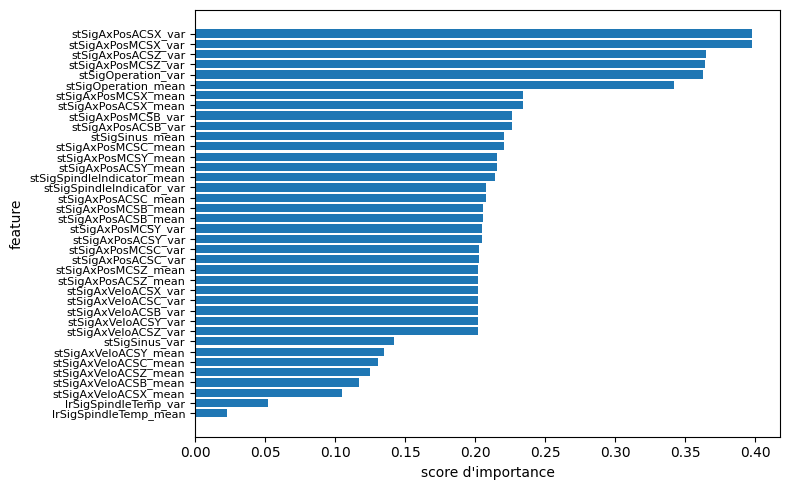

In [23]:
features_names = [i + "_mean" for i in df_means_clean.index] + [i + "_var" for i in df_vars_clean.index]


print(len(features_names))
print(features_names)

# On trie les paires (label, value) par valeur croissante
sorted_pairs = sorted(zip(features_names, norms), key=lambda x: x[1])

# On sépare à nouveau les labels et les valeurs triées
sorted_labels, sorted_values = zip(*sorted_pairs)



# Bar plot horizontal
plt.figure(figsize=(8, 5))
plt.barh(sorted_labels, sorted_values)
plt.yticks(sorted_labels, sorted_labels, fontsize=8)
plt.xlabel("score d'importance")
plt.ylabel('feature')
plt.tight_layout()
plt.show()

['stSigAxPosMCSY_var', 'stSigAxPosACSB_mean', 'stSigAxPosMCSB_mean', 'stSigAxPosACSC_mean', 'stSigSpindleIndicator_var']


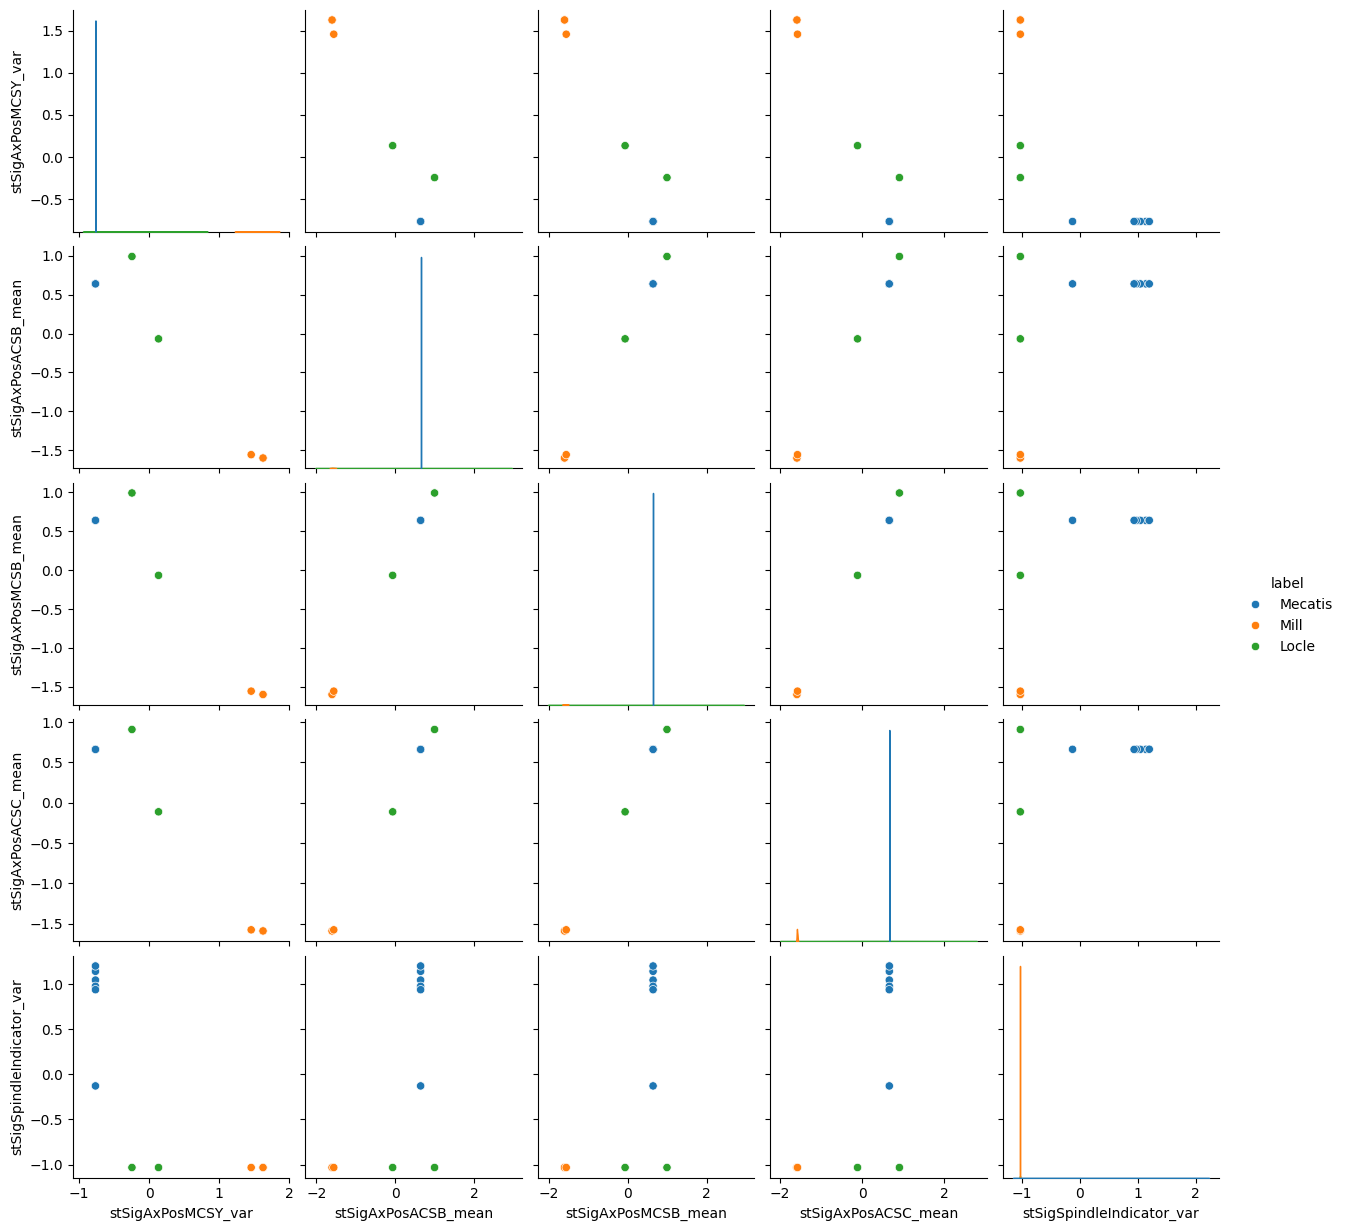

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

#select best features
best_features = list(sorted_labels[-20:-15]) # [-20:-15] : interessent
print(best_features)

#create a df with all norm data and 

df_norm  = pd.DataFrame(data=X_scaled.transpose(), columns=df_means_clean.columns, index=features_names)
#transpose to be compatible with paiplot
df_norm_transposed = df_norm.transpose()
#Add labels
labels = np.array(["Mecatis","Mecatis","Mecatis","Mecatis","Mecatis","Mecatis","Mill","Mill","Mill","Locle","Locle"])
df_norm_transposed["label"]=labels

#pairplot best features
df_subset = df_norm_transposed[best_features + ['label']]
sns.pairplot(df_subset, hue="label")

plt.show()

(6, 2)
(3, 2)
(2, 2)


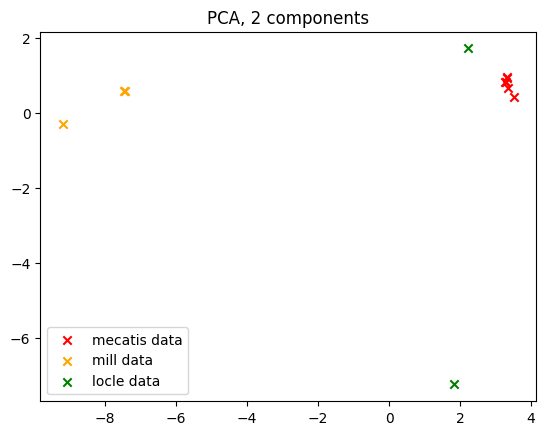

In [25]:


X_mecatis, X_mill, X_locle = X_pca[:6], X_pca[6:9], X_pca[9:]
print(X_mecatis.shape)
print(X_mill.shape)
print(X_locle.shape)


plt.scatter(X_mecatis[:,0], X_mecatis[:,1], color='red', label="mecatis data", marker="x")
plt.scatter(X_mill[:,0],X_mill[:,1], color='orange', label="mill data", marker="x")
plt.scatter(X_locle[:,0],X_locle[:,1], color='green', label="locle data", marker="x")
plt.legend()
plt.title("PCA, 2 components")
plt.show()


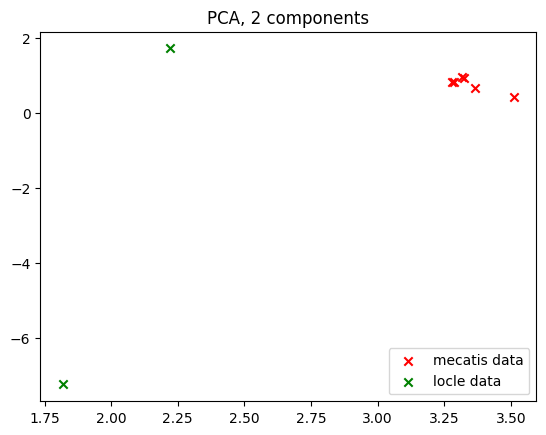

In [26]:
plt.scatter(X_mecatis[:,0], X_mecatis[:,1], color='red', label="mecatis data", marker="x")
plt.scatter(X_locle[:,0],X_locle[:,1], color='green', label="locle data", marker="x")
plt.legend()
plt.title("PCA, 2 components")
plt.show()

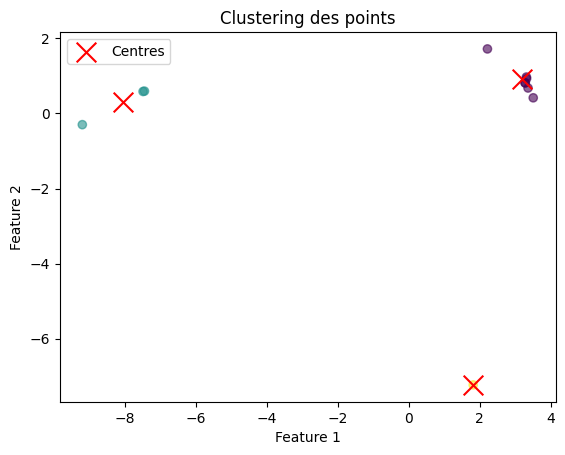

In [27]:
from sklearn.cluster import KMeans
def cluster_points(data: np.ndarray, n_clusters: int = 3):
    """
    Applique l'algorithme de clustering KMeans aux données fournies.
    
    :param data: np.ndarray de shape (n_samples, n_features)
    :param n_clusters: Nombre de clusters à former
    :return: Les labels des clusters et les centres des clusters
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    
    return labels, centers

def plot_clusters(data: np.ndarray, labels: np.ndarray, centers: np.ndarray):
    """
    Affiche les clusters et leurs centres (valable uniquement pour n_features=2).
    
    :param data: np.ndarray de shape (n_samples, 2)
    :param labels: Labels des clusters attribués aux points
    :param centers: Centres des clusters
    """
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centres')
    plt.title('Clustering des points')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


labels, centers = cluster_points(X_pca, n_clusters=3)
plot_clusters(X_pca, labels, centers)
